# 군집 DBSCAN (2)

## #01. 패키지

In [1]:
import sys
import seaborn as sb
from pandas import read_excel
from matplotlib import pyplot as plt

# 데이터샛 생성 함수
from sklearn.datasets import make_moons

# 클러스터 알고리즘 참조
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터 준비

In [4]:
origin = read_excel("https://data.hossam.kr/G02/customer.xlsx", index_col="고객ID")
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      200 non-null    object
 1   나이      200 non-null    int64 
 2   연수입     200 non-null    int64 
 3   지출점수    200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


,성별,나이,연수입,지출점수
고객ID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### 연수입에 따른 지출점수 확인

In [5]:
origin.columns

Index(['성별', '나이', '연수입', '지출점수'], dtype='object')

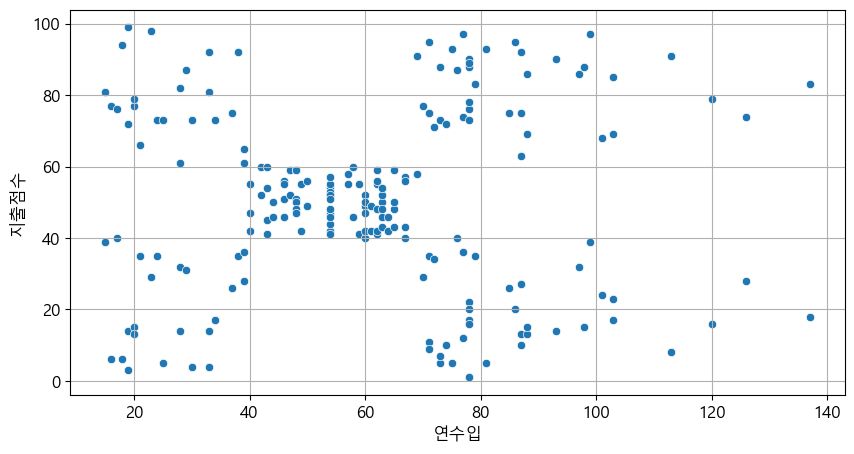

In [6]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='연수입', y= '지출점수')
# plt.title('data')
# plt.xlabel('time')
# plt.ylabel('level')
plt.grid()
plt.show()
plt.close()

## #03. 전처리

### 필요한 필드 추출

In [7]:
x = origin.filter(['연수입', '지출점수'])
x.head()

,연수입,지출점수
고객ID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


### 표준화

In [8]:
scaler = StandardScaler()
scaler.fit(x)   # DF의 데이터 학습
# DF의 각 열의 값을 해당 열의 최소값과 최대값 사이의 범위로 변환한 새로운 데이터 배열
n_data = scaler.transform(x)
n_data[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## #04. DBSCAN 구현

| 파라미터 | 설명 |
| -- | -- |
| `eps` | 하나의 샘플에 대한 다른 샘플과의 최대 거리 |
| `min_samples` | MinPts. 핵심 포인트로 간주할 포인트에 대한 이웃의 샘플 수 |

### 모델 구축

In [9]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(n_data)       # 학습

DBSCAN(eps=0.2)

### 군집 결과

In [10]:
cluster_label = dbscan.labels_
cluster_label

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  2, -1,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

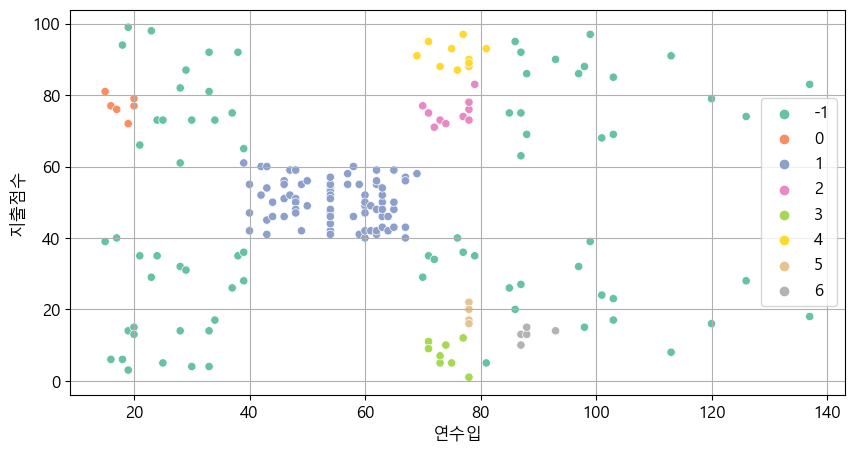

In [11]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='연수입', y= '지출점수', hue= cluster_label, palette='Set2')
# plt.title('data')
# plt.xlabel('time')
# plt.ylabel('level')
plt.grid()
plt.show()
plt.close()

## #05. 핵심 포인트 확인

### 핵심포인트의 인덱스

In [12]:
core = dbscan.core_sample_indices_
core

array([  3,   5,  13,  47,  48,  49,  50,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 129,
       130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 147,
       149, 150, 151, 155, 157, 159, 174, 176], dtype=int64)

### 해당 인덱스의 실 데이터

In [13]:
component = dbscan.components_
component

array([[-1.70082976,  1.04041783],
       [-1.66266033,  1.00159627],
       [-1.54815205,  1.04041783],
       [-0.78476346, -0.12422899],
       [-0.78476346, -0.3183368 ],
       [-0.78476346, -0.3183368 ],
       [-0.70842461,  0.06987881],
       [-0.67025518,  0.14752193],
       [-0.67025518,  0.38045129],
       [-0.67025518, -0.20187212],
       [-0.67025518, -0.35715836],
       [-0.63208575, -0.00776431],
       [-0.63208575, -0.16305055],
       [-0.55574689,  0.03105725],
       [-0.55574689, -0.16305055],
       [-0.55574689,  0.22516505],
       [-0.55574689,  0.18634349],
       [-0.51757746,  0.06987881],
       [-0.51757746,  0.34162973],
       [-0.47940803,  0.03105725],
       [-0.47940803,  0.34162973],
       [-0.47940803, -0.00776431],
       [-0.47940803, -0.08540743],
       [-0.47940803,  0.34162973],
       [-0.47940803, -0.12422899],
       [-0.4412386 ,  0.18634349],
       [-0.4412386 , -0.3183368 ],
       [-0.40306917, -0.04658587],
       [-0.40306917,

### 학습 데이터 중에서 핵심 포인트의 인덱스와 일치하는 데이터 찾기

In [14]:
is_core = []

for i in range(0, n_data.shape[0]):
    if i in core:
        is_core.append(1)
    else:
        is_core.append(0)

print(is_core)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 시각화

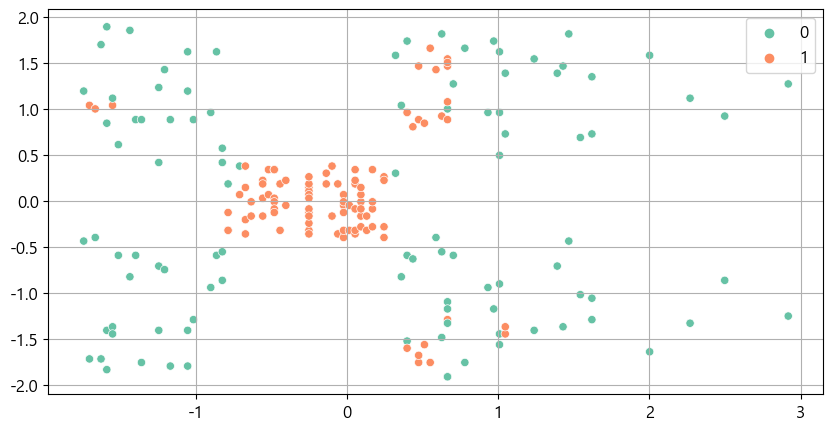

In [15]:
plt.figure(figsize=(10,5))
sb.scatterplot(x=n_data[:,0], y=n_data[:,1], hue=is_core, palette='Set2')
# plt.title('data')
# plt.xlabel('time')
# plt.ylabel('level')
plt.grid()
plt.show()
plt.close()